<a href="https://colab.research.google.com/github/Avinashsinghjawa/Deep-learning/blob/master/R6_ExternalLab_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
import pandas as pd

In [7]:
trainY = pd.get_dummies(trainY)
trainY[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [8]:
testY = pd.get_dummies(testY)
testY[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ',    0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  0  0  0  0  1
1  1  0  0  0  0  0  0  0  0  0
2  1  0  0  0  0  0  0  0  0  0
3  0  0  0  1  0  0  0  0  0  0
4  1  0  0  0  0  0  0  0  0  0)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  0  0  0  0  1)


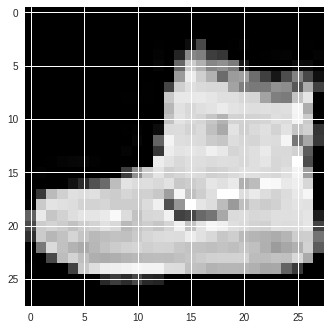

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
1  1  0  0  0  0  0  0  0  0  0)


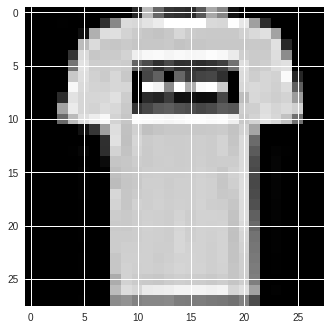

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
2  1  0  0  0  0  0  0  0  0  0)


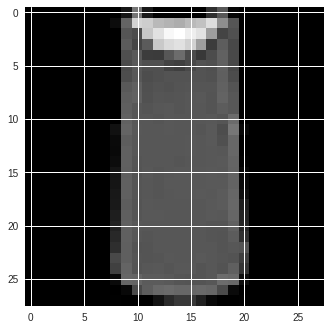

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
3  0  0  0  1  0  0  0  0  0  0)


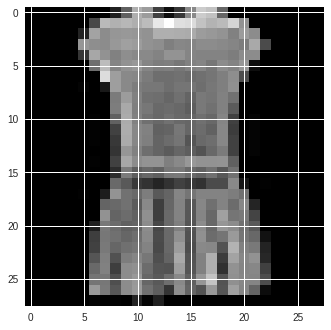

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
4  1  0  0  0  0  0  0  0  0  0)


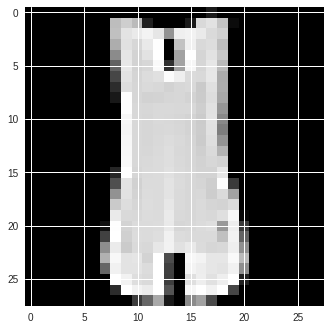

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
5  0  0  1  0  0  0  0  0  0  0)


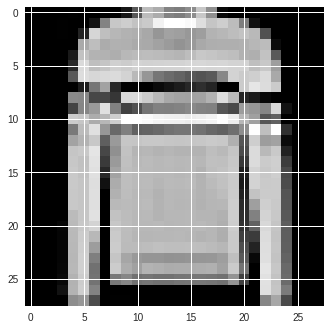

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
6  0  0  0  0  0  0  0  1  0  0)


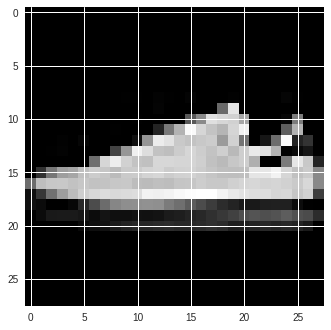

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
7  0  0  1  0  0  0  0  0  0  0)


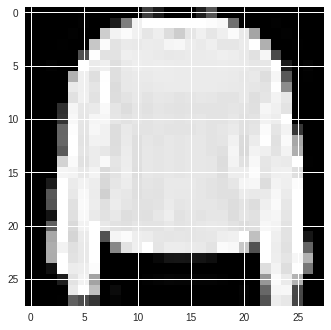

((1, 28, 28),    0  1  2  3  4  5  6  7  8  9
8  0  0  0  0  0  1  0  0  0  0)


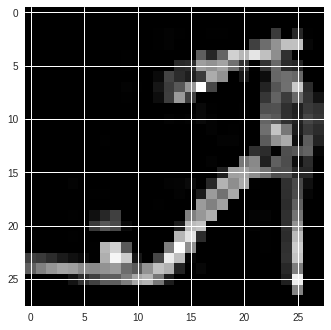

In [12]:
for i in np.arange(0,9):
  
# get the first image and it's label
  img1_arr, img1_label = trainX[i:i+1,:], trainY[i:i+1]
  print(img1_arr.shape, img1_label)
# (784L,) , 5

# reshape first image(1 D vector) to 2D dimension image
  img1_2d = np.reshape(img1_arr, (28, 28))
# show it
  plt.subplot(111)
  plt.imshow(img1_2d, cmap=plt.get_cmap('gray'))
  plt.show()
  i=i+1

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 6s 98us/sample - loss: 0.6317 - acc: 0.7780 - val_loss: 0.4664 - val_acc: 0.8333
Epoch 2/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4340 - acc: 0.8440 - val_loss: 0.4256 - val_acc: 0.8483
Epoch 3/100
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3947 - acc: 0.8576 - val_loss: 0.4039 - val_acc: 0.8542
Epoch 4/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3690 - acc: 0.8666 - val_loss: 0.3855 - val_acc: 0.8642
Epoch 5/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3512 - acc: 0.8714 - val_loss: 0.3810 - val_acc: 0.8687
Epoch 6/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3369 - acc: 0.8771 - val_loss: 0.3727 - val_acc: 0.8681
Epoch 7/100
60000/60000 [==============================] - 5s 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [15]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7034 - acc: 0.7599 - val_loss: 0.5671 - val_acc: 0.8010
Epoch 2/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5200 - acc: 0.8217 - val_loss: 0.5219 - val_acc: 0.8205
Epoch 3/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4876 - acc: 0.8332 - val_loss: 0.5037 - val_acc: 0.8270
Epoch 4/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4686 - acc: 0.8390 - val_loss: 0.4898 - val_acc: 0.8316
Epoch 5/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4576 - acc: 0.8433 - val_loss: 0.4864 - val_acc: 0.8315
Epoch 6/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4504 - acc: 0.8446 - val_loss: 0.4778 - val_acc: 0.8334
Epoch 7/100
60000/60000 [==============================] - 2s 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/sample - loss: 1.2656 - acc: 0.5771 - val_loss: 0.8923 - val_acc: 0.7005
Epoch 2/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.8106 - acc: 0.7211 - val_loss: 0.7535 - val_acc: 0.7432
Epoch 3/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7129 - acc: 0.7544 - val_loss: 0.6901 - val_acc: 0.7625
Epoch 4/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6604 - acc: 0.7726 - val_loss: 0.6526 - val_acc: 0.7763
Epoch 5/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6288 - acc: 0.7845 - val_loss: 0.6263 - val_acc: 0.7855
Epoch 6/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6050 - acc: 0.7925 - val_loss: 0.6085 - val_acc: 0.7916
Epoch 7/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5855 - acc: 0.7997 - val_l

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

The above model has one input layer with 784 features, there are 2 hidden dense layers  with 100, 100 and nodes each with Sigmoid as activation function.

The out put layer is having 10 nodes with Softmax activation to allow 10 class classificatoion 

So far the accuracy is not going above 88%.

### Run the model

In [19]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 52us/sample - loss: 1.5525 - acc: 0.5965 - val_loss: 1.0594 - val_acc: 0.6956
Epoch 2/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8759 - acc: 0.7355 - val_loss: 0.7537 - val_acc: 0.7500
Epoch 3/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6868 - acc: 0.7659 - val_loss: 0.6431 - val_acc: 0.7736
Epoch 4/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6025 - acc: 0.7882 - val_loss: 0.5829 - val_acc: 0.7912
Epoch 5/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5519 - acc: 0.8056 - val_loss: 0.5429 - val_acc: 0.8058
Epoch 6/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5146 - acc: 0.8191 - val_loss: 0.5159 - val_acc: 0.8147
Epoch 7/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4890 - acc: 0.8269 - val_l

**Extra**

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer
#model.add(tf.keras.layers.Dense(60, activation='sigmoid'))


#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/sample - loss: 1.0976 - acc: 0.6431 - val_loss: 0.6577 - val_acc: 0.7675
Epoch 2/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5802 - acc: 0.7929 - val_loss: 0.5517 - val_acc: 0.8031
Epoch 3/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5059 - acc: 0.8177 - val_loss: 0.5080 - val_acc: 0.8167
Epoch 4/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4681 - acc: 0.8306 - val_loss: 0.4832 - val_acc: 0.8295
Epoch 5/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4430 - acc: 0.8396 - val_loss: 0.4656 - val_acc: 0.8344
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4263 - acc: 0.8464 - val_loss: 0.4512 - val_acc: 0.8409
Epoch 7/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4105 - acc: 0.8521 - val_loss: 0.